<strong><h1>Preâmbulo</h1></strong>

In [1]:
import Pkg
using Pkg
Pkg.add("StatsPlots")
Pkg.add("CSV")
Pkg.add("DataFrames")
using StatsPlots
using CSV
using DataFrames

<strong><h1>Mandelbrot - Sequencial</h1></strong>
Texto pode ser digitado aqui

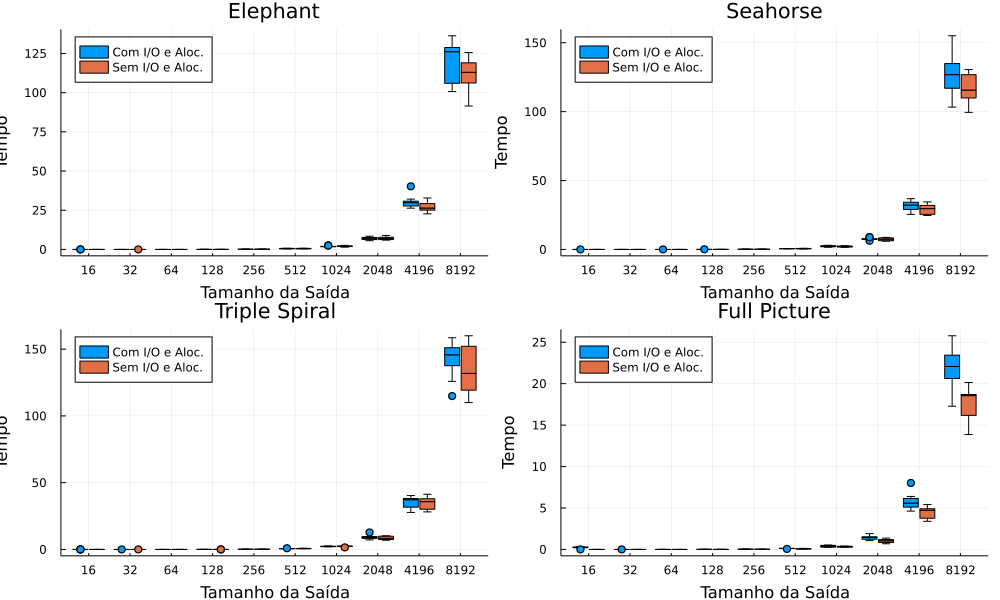

In [2]:
dataIoPaths = [ "../tests/seq/with-IO-Aloc/elephant.csv",
                "../tests/seq/with-IO-Aloc/seahorse.csv",
                "../tests/seq/with-IO-Aloc/triple_spiral.csv",
                "../tests/seq/with-IO-Aloc/full.csv"]
dataNoIoPaths = [ "../tests/seq/no-IO-Aloc/elephant.csv",
                "../tests/seq/no-IO-Aloc/seahorse.csv",
                "../tests/seq/no-IO-Aloc/triple_spiral.csv",
                "../tests/seq/no-IO-Aloc/full.csv"]
titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]

x = repeat(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"], outer=20)
p = []

for i in 1:4
    v = []
    w = []
    dataIO = CSV.read(dataIoPaths[i], DataFrame)
    dataNoIO = CSV.read(dataNoIoPaths[i], DataFrame)
    
    for row in eachrow(dataIO)
        v = [v;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end
    
    for row in eachrow(dataNoIO)
        w = [w;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end
    y = [v;vec(w)]

    push!(p, groupedboxplot(x, y, bar_width = 0.8,
                    group = repeat(["Com I/O e Aloc.", "Sem I/O e Aloc."], inner = 100),
                    xlabel = "Tamanho da Saída", ylabel="Tempo", legend=:topleft))
end
plot(p[1], p[2], p[3], p[4], title = titles, layout = (2,2))
plot!(size=(1000,600))

<strong><h1>Mandelbrot - Pthreads</h1></strong>
Texto pode ser digitado aqui

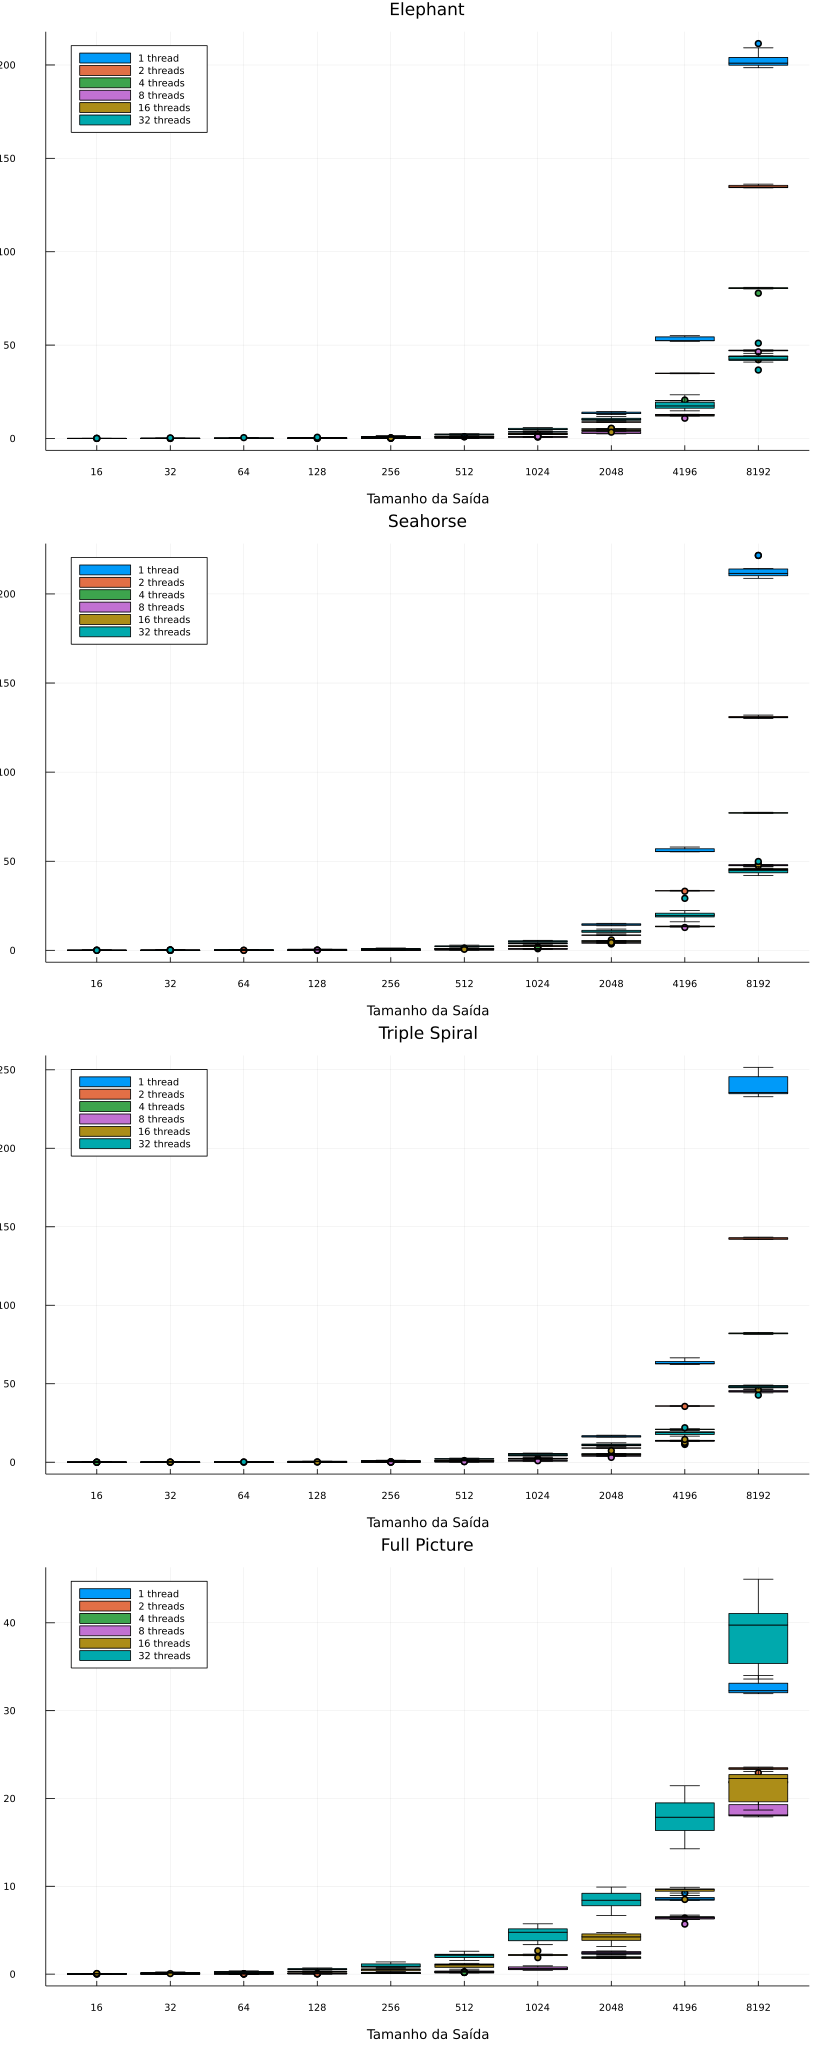

In [61]:
dataElephantPaths = [ "../tests/pth/elephant/elephant_1.csv",
                    "../tests/pth/elephant/elephant_2.csv",
                    "../tests/pth/elephant/elephant_4.csv",
                    "../tests/pth/elephant/elephant_8.csv",
                    "../tests/pth/elephant/elephant_16.csv",
                    "../tests/pth/elephant/elephant_32.csv"]

dataSeahorsePaths = [ "../tests/pth/seahorse/seahorse_1.csv",
                    "../tests/pth/seahorse/seahorse_2.csv",
                    "../tests/pth/seahorse/seahorse_4.csv",
                    "../tests/pth/seahorse/seahorse_8.csv",
                    "../tests/pth/seahorse/seahorse_16.csv",
                    "../tests/pth/seahorse/seahorse_32.csv"]

dataTSPaths = [ "../tests/pth/triple_spiral/triple_spiral_1.csv",
                "../tests/pth/triple_spiral/triple_spiral_2.csv",
                "../tests/pth/triple_spiral/triple_spiral_4.csv",
                "../tests/pth/triple_spiral/triple_spiral_8.csv",
                "../tests/pth/triple_spiral/triple_spiral_16.csv",
                "../tests/pth/triple_spiral/triple_spiral_32.csv"]

dataFullPaths = [ "../tests/pth/full/full_1.csv",
                "../tests/pth/full/full_2.csv",
                "../tests/pth/full/full_4.csv",
                "../tests/pth/full/full_8.csv",
                "../tests/pth/full/full_16.csv",
                "../tests/pth/full/full_32.csv"]

titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]
dataPaths = [dataElephantPaths, dataSeahorsePaths, dataTSPaths, dataFullPaths]

x = ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"]
legends = ["1 thread", "2 threads", "4 threads", "8 threads", "16 threads", "32 threads"]
p = []

for j in 1:4
    boxplotRegion = plot()
    for i in 1:6
        v = []
        data = CSV.read(dataPaths[j][i], DataFrame)

        for row in eachrow(data)
            v = [v;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
        end

        boxplotRegion = groupedboxplot!(x, vec(v), bar_width = 0.8, xlabel = "Tamanho da Saída", ylabel="Tempo", legend=:topleft, label=legends[i])
    end
    push!(p, boxplotRegion)
end


plot(p[1], p[2], p[3], p[4], title = titles, layout = (4,1))
plot!(size=(1000,2500))

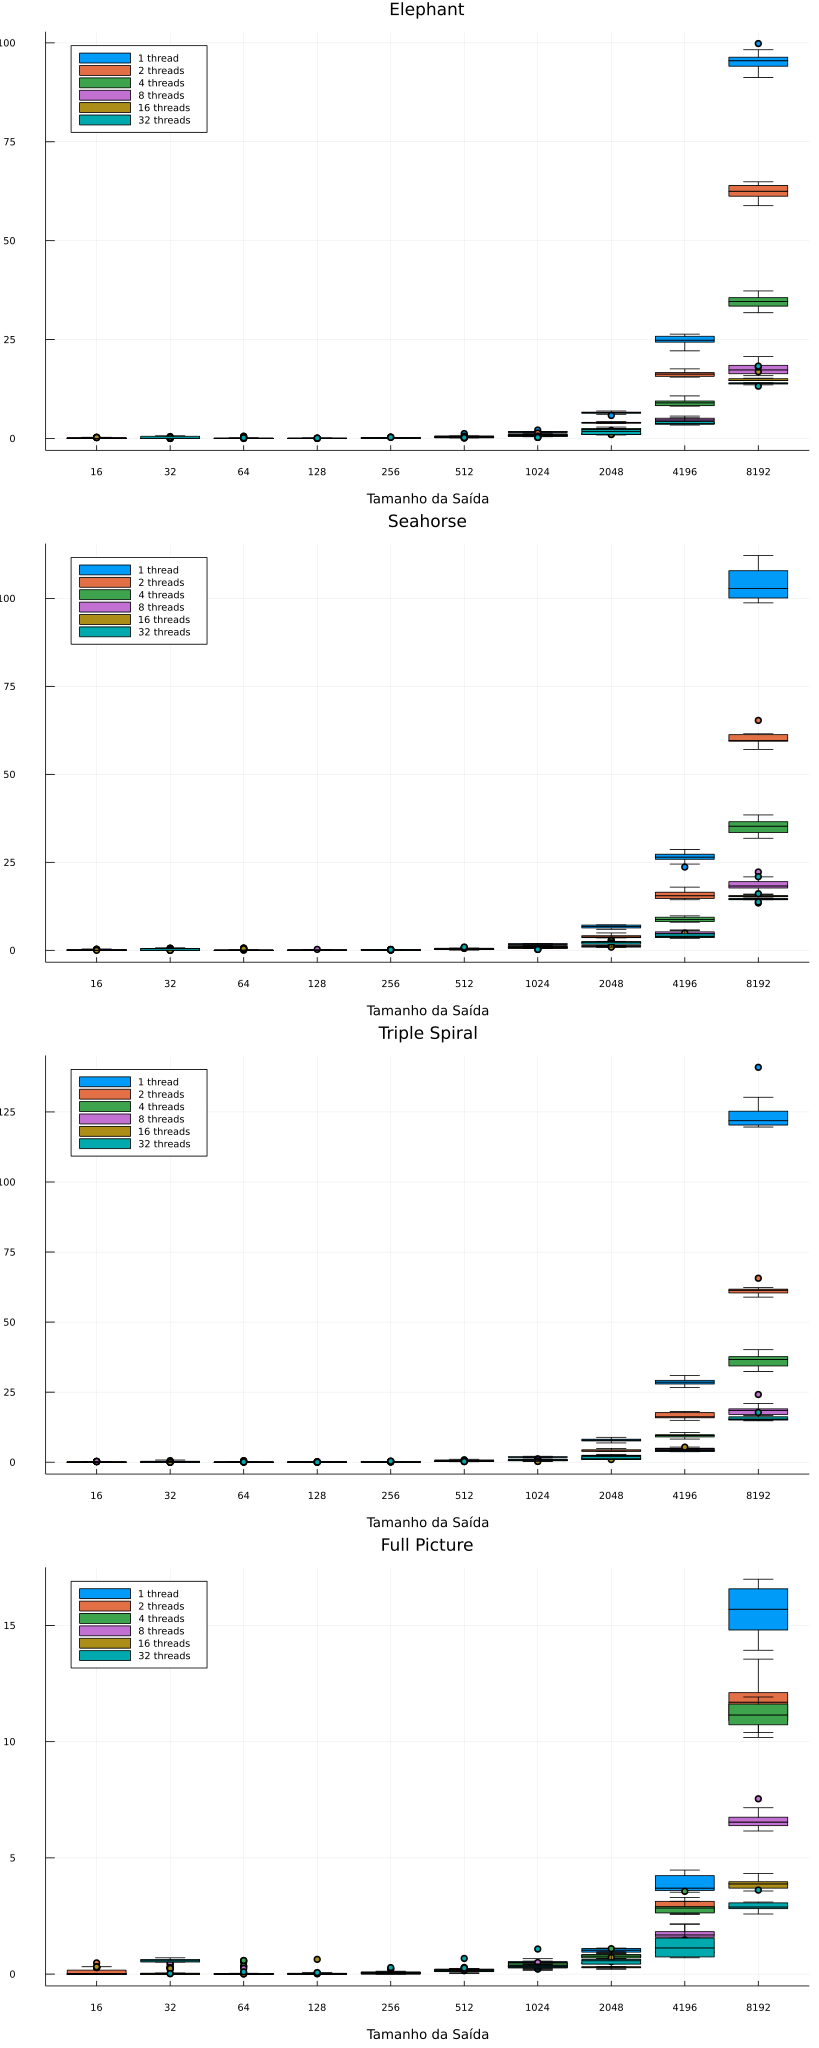

In [62]:
dataElephantPaths = [ "../tests/omp/elephant/elephant_1.csv",
                    "../tests/omp/elephant/elephant_2.csv",
                    "../tests/omp/elephant/elephant_4.csv",
                    "../tests/omp/elephant/elephant_8.csv",
                    "../tests/omp/elephant/elephant_16.csv",
                    "../tests/omp/elephant/elephant_32.csv"]

dataSeahorsePaths = [ "../tests/omp/seahorse/seahorse_1.csv",
                    "../tests/omp/seahorse/seahorse_2.csv",
                    "../tests/omp/seahorse/seahorse_4.csv",
                    "../tests/omp/seahorse/seahorse_8.csv",
                    "../tests/omp/seahorse/seahorse_16.csv",
                    "../tests/omp/seahorse/seahorse_32.csv"]

dataTSPaths = [ "../tests/omp/triple_spiral/triple_spiral_1.csv",
                "../tests/omp/triple_spiral/triple_spiral_2.csv",
                "../tests/omp/triple_spiral/triple_spiral_4.csv",
                "../tests/omp/triple_spiral/triple_spiral_8.csv",
                "../tests/omp/triple_spiral/triple_spiral_16.csv",
                "../tests/omp/triple_spiral/triple_spiral_32.csv"]

dataFullPaths = [ "../tests/omp/full/full_1.csv",
                "../tests/omp/full/full_2.csv",
                "../tests/omp/full/full_4.csv",
                "../tests/omp/full/full_8.csv",
                "../tests/omp/full/full_16.csv",
                "../tests/omp/full/full_32.csv" ]

titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]
dataPaths = [dataElephantPaths, dataSeahorsePaths, dataTSPaths, dataFullPaths]

x = ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"]
legends = ["1 thread", "2 threads", "4 threads", "8 threads", "16 threads", "32 threads"]
p = []

for j in 1:4
    boxplotRegion = plot()
    for i in 1:6
        v = []
        data = CSV.read(dataPaths[j][i], DataFrame)

        for row in eachrow(data)
            v = [v;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
        end

        boxplotRegion = groupedboxplot!(x, vec(v), bar_width = 0.8, xlabel = "Tamanho da Saída", ylabel="Tempo", legend=:topleft, label=legends[i])
    end
    push!(p, boxplotRegion)
end


plot(p[1], p[2], p[3], p[4], title = titles, layout = (4,1))
plot!(size=(1000,2500))